# Dataset: *ferguson*

- df.to_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-df.csv',index=False)
- src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-src.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
import nltk
from nltk import FreqDist, word_tokenize

In [2]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-df-2.csv', encoding = 'utf-8', header = 0)
print(df.columns)
print(df.shape)
df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date',
       'reply_tweet_id', 'reply_user_id', 'reply_tweet', 'reply_date', 'label',
       'cleaned_reply_tw', 'reply_sentiment', 'reply_emo_ro'],
      dtype='object')
(21729, 12)


,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro
0,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982355e+17,1.539100e+09,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,0,black teenage boys not men children stop refer...,Negative,anger


In [3]:
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\ferguson-src-2.csv', encoding = 'utf-8', header =0)
print(src_tw_df.columns)
print(src_tw_df.shape)
src_tw_df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date', 'label',
       'cleaned_src_tw', 'src_sentiment', 'src_emo_ro'],
      dtype='object')
(1143, 8)


,src_tweet_id,src_user_id,src_tweet,src_date,label,cleaned_src_tw,src_sentiment,src_emo_ro
0,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,0,black teenage boys not men children stop refer...,Negative,anger


In [4]:
src_tw_df.loc[src_tw_df.cleaned_src_tw.isnull(),['src_tweet_id','src_tweet','cleaned_src_tw','src_sentiment']]

,src_tweet_id,src_tweet,cleaned_src_tw,src_sentiment
31,498274493337702401,: Teenager #MikeBrown won't start college on M...,NaN,Neutral
65,498287947301814274,Police dogs snarl at a crowd of mourners in #F...,NaN,Neutral
74,498293625420148736,RT @_westwest_yall: Never forget the original ...,NaN,Neutral
158,498507434693246977,RT @TOO_LIVE_MILZ: The sad truth RT @kupkakeka...,NaN,Neutral
289,499441454498852864,RT @PDPJ: #Ferguson picture from earlier in th...,NaN,Neutral
314,499507509171060736,RT @manofsteele: Man picks up burning tear gas...,NaN,Neutral
315,499511714438971392,RT @tabithalou: This what they not showing you...,NaN,Neutral
405,499650234914713600,RT @AntonioFrench: State Senator asks the #Fer...,NaN,Neutral
436,499672226887897089,RT @freegcf: RT @organizemo: @OpFerguson PLS R...,NaN,Neutral
443,499676350064508928,RT @JJohnsonKMOV: Intersection of Canfield and...,NaN,Neutral


In [5]:
df1 = pd.merge(df, src_tw_df[['src_tweet_id','cleaned_src_tw','src_sentiment','src_emo_ro']],\
               on='src_tweet_id')
df1.head(1)

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,reply_sentiment,reply_emo_ro,cleaned_src_tw,src_sentiment,src_emo_ro
0,498235547685756928,1539100118,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,4.982355e+17,1.539100e+09,Black teenage boys are not men. They are child...,Sat Aug 09 22:33:06 +0000 2014,0,black teenage boys not men children stop refer...,Negative,anger,black teenage boys not men children stop refer...,Negative,anger


In [6]:
print("df's shape: ",df.shape)
print("df1's shape: ",df1.shape)
print("src_tw_df's shapes: ", src_tw_df.shape)

df's shape:  (21729, 12)
df1's shape:  (21729, 15)
src_tw_df's shapes:  (1143, 8)


In [ ]:
src_null = df1.loc[df1.cleaned_src_tw.isnull()].index

In [ ]:
#df1.drop(src_null,0).shape

## Sentiment Analysis

In [7]:
src_tw_df.label.value_counts(normalize=True)

0    0.751531
1    0.248469
Name: label, dtype: float64

### Source Tweets 

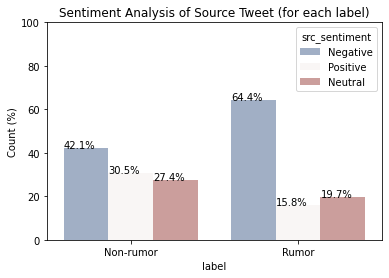

In [18]:
g = src_tw_df.groupby(['label'])['src_sentiment'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='src_sentiment',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')
g.axes.set_title('Sentiment Analysis of Source Tweet (for each label)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.savefig('D:/論文/PHEME9/Code/graph/ferguson/src-sentiment.pdf',dpi=300)

Text(0.5, 1.0, '# of rumor/non-rumor Source tweet (for each sentiment class).')

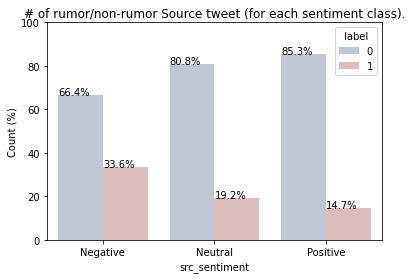

In [8]:
g = src_tw_df.groupby(['src_sentiment'])['label'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='src_sentiment',y='count',hue='label',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('# of rumor/non-rumor Source tweet (for each sentiment class).',fontsize=12)

### Reply Tweets

In [9]:
df.reply_sentiment.value_counts(normalize=True)

Negative    0.408072
Positive    0.319389
Neutral     0.272539
Name: reply_sentiment, dtype: float64

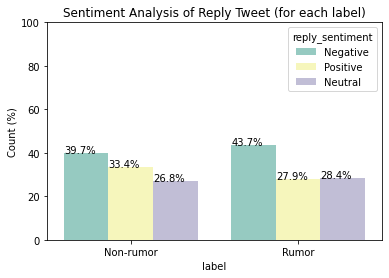

In [17]:
g = df.groupby(['label'])['reply_sentiment'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='reply_sentiment',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_title('Sentiment Analysis of Reply Tweet (for each label)')
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.savefig('D:/論文/PHEME9/Code/graph/ferguson/reply-sentiment.pdf',dpi=300)

Text(0.5, 1.0, '# of rumor/non-rumor Reply tweet (for each sentiment class).')

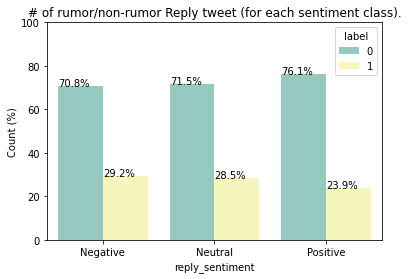

In [11]:
g = df.groupby(['reply_sentiment'])['label'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='reply_sentiment',y='count',hue='label',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('# of rumor/non-rumor Reply tweet (for each sentiment class).',fontsize=12)

## Emotion Analysis

### Source Tweets

In [12]:
src_tw_df['src_emo_ro'].value_counts(normalize=True)

anger       0.776903
joy         0.099738
sadness     0.098863
optimism    0.024497
Name: src_emo_ro, dtype: float64

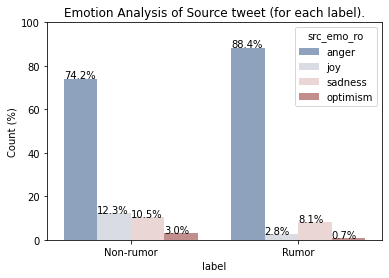

In [16]:
g = src_tw_df.groupby(['label'])['src_emo_ro'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='src_emo_ro',palette="vlag")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('Emotion Analysis of Source tweet (for each label).',fontsize=12)
plt.savefig('D:/論文/PHEME9/Code/graph/ferguson/src-emotion.pdf',dpi=300)

### Reply Tweets

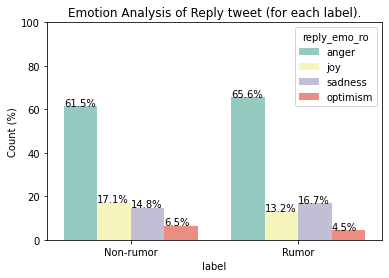

In [15]:
g =df.groupby(['label'])['reply_emo_ro'].value_counts(normalize=True).mul(100).rename('count').reset_index()\
.pipe((sns.barplot,'data'), x ='label',y='count',hue='reply_emo_ro',palette="Set3")

g.axes.set_ylim(0,100)
g.axes.set_xticklabels(['Non-rumor','Rumor'])
g.axes.set_ylabel('Count (%)')

for p in g.axes.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.axes.text(txt_x,txt_y,txt)
plt.title('Emotion Analysis of Reply tweet (for each label).',fontsize=12)
plt.savefig('D:/論文/PHEME9/Code/graph/ferguson/reply-emotion.pdf',dpi=300)